# Aula 1 - Tratando os dados

In [117]:
import pandas as pd

In [118]:
cadastrados = pd.read_csv("dados/clientes_cadastrados.csv", sep=",")
cadastrados.head(3)

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0


In [119]:
cadastrados.shape

(438557, 18)

In [120]:
cadastrados["ID_Cliente"].value_counts() #existem ids duplicados

ID_Cliente
7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: count, Length: 438510, dtype: int64

In [121]:
cadastrados[cadastrados["ID_Cliente"].duplicated(keep=False)].shape
# existem 94 ids duplicados

(94, 18)

In [122]:
ids_repetidos = cadastrados[cadastrados["ID_Cliente"].duplicated(keep=False)]

In [123]:
df_cadastrados_limpo = cadastrados.drop(ids_repetidos.index)

In [124]:
df_cadastrados_limpo["ID_Cliente"].value_counts()

ID_Cliente
5008804    1
6147691    1
6147689    1
6147688    1
6147685    1
          ..
6093492    1
5690720    1
6538938    1
6538937    1
6842885    1
Name: count, Length: 438463, dtype: int64

In [125]:
# tratando dados nulos
df_cadastrados_limpo.isnull().sum()

ID_Cliente                    0
Genero                        0
Tem_carro                     0
Tem_casa_propria              0
Qtd_filhos                    0
Rendimento_anual              0
Categoria_de_renda            0
Grau_escolaridade             0
Estado_civil                  0
Moradia                       0
Idade                         0
Anos_empregado                0
Tem_celular                   0
Tem_telefone_trabalho         0
Tem_telefone_fixo             0
Tem_email                     0
Ocupacao                 134177
Tamanho_familia               0
dtype: int64

In [126]:
df_cadastrados_limpo["Ocupacao"].unique()

array([nan, 'Segurança', 'Vendas', 'Contabilidade', 'Construção Civil',
       'Gerência', 'Motorista', 'Equipe principal', 'Alta tecnologia',
       'Limpeza', 'Serviço privado', 'Cozinha', 'Baixa qualificação',
       'Medicina', 'Secretariado', 'Garçom', 'RH', 'Corretor imobiliário',
       'TI'], dtype=object)

In [127]:
df_cadastrados_limpo["Ocupacao"].fillna(value="Outro", inplace=True)

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_2289/206446836.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cadastrados_limpo["Ocupacao"].fillna(value="Outro", inplace=True)


In [128]:
df_cadastrados_limpo.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_carro                0
Tem_casa_propria         0
Qtd_filhos               0
Rendimento_anual         0
Categoria_de_renda       0
Grau_escolaridade        0
Estado_civil             0
Moradia                  0
Idade                    0
Anos_empregado           0
Tem_celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_familia          0
dtype: int64

In [129]:
df_cadastrados_limpo.nunique()

ID_Cliente               438463
Genero                        2
Tem_carro                     2
Tem_casa_propria              2
Qtd_filhos                   12
Rendimento_anual            866
Categoria_de_renda            5
Grau_escolaridade             5
Estado_civil                  5
Moradia                       6
Idade                     16379
Anos_empregado             9406
Tem_celular                   1
Tem_telefone_trabalho         2
Tem_telefone_fixo             2
Tem_email                     2
Ocupacao                     19
Tamanho_familia              13
dtype: int64

In [130]:
df_cadastrados_limpo.drop("Genero", axis=1, inplace=True)

In [131]:
df_cadastrados_limpo.drop("Tem_celular", axis=1, inplace=True)

In [132]:
df_cadastrados_limpo.head(3)

,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
1,5008805,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
2,5008806,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,0,0,0,Segurança,2.0


In [133]:
df_cadastrados_limpo["Tem_carro"].unique()

array(['Y', 'N'], dtype=object)

In [134]:
df_cadastrados_limpo["Tem_casa_propria"].unique()

array(['Y', 'N'], dtype=object)

In [135]:
df_cadastrados_limpo["Tem_telefone_trabalho"].unique()

array([1, 0])

In [136]:
df_cadastrados_limpo["Tem_telefone_fixo"].unique()

array([0, 1])

In [137]:
df_cadastrados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  object 
 2   Tem_casa_propria       438463 non-null  object 
 3   Qtd_filhos             438463 non-null  int64  
 4   Rendimento_anual       438463 non-null  float64
 5   Categoria_de_renda     438463 non-null  object 
 6   Grau_escolaridade      438463 non-null  object 
 7   Estado_civil           438463 non-null  object 
 8   Moradia                438463 non-null  object 
 9   Idade                  438463 non-null  int64  
 10  Anos_empregado         438463 non-null  int64  
 11  Tem_telefone_trabalho  438463 non-null  int64  
 12  Tem_telefone_fixo      438463 non-null  int64  
 13  Tem_email              438463 non-null  int64  
 14  Ocupacao               438463 non-null  o

In [138]:
df_cadastrados_limpo["Tem_carro"] = df_cadastrados_limpo["Tem_carro"].replace(["Y", "N"], [1,0])

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_2289/929535960.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cadastrados_limpo["Tem_carro"] = df_cadastrados_limpo["Tem_carro"].replace(["Y", "N"], [1,0])


In [139]:
df_cadastrados_limpo["Tem_casa_propria"] = df_cadastrados_limpo["Tem_carro"].replace(["Y", "N"], [1,0])

In [140]:
df_cadastrados_limpo["Tem_casa_propria"].unique()

array([1, 0])

In [141]:
df_cadastrados_limpo.head(3)

,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,0,0,0,Segurança,2.0


In [142]:
df_cadastrados_limpo["Idade"] = -df_cadastrados_limpo["Idade"]/365.2425

In [143]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

Anos_empregado
 365243    75314
-218         262
-1678        251
-249         241
-978         240
           ...  
-13529         1
-10223         1
-8917          1
-11429         1
-8105          1
Name: count, Length: 9406, dtype: int64

In [144]:
df_cadastrados_limpo["Anos_empregado"] = -df_cadastrados_limpo["Anos_empregado"]/365.2425

In [145]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

Anos_empregado
-1000.001369    75314
 0.596864         262
 4.594208         251
 0.681739         241
 2.677673         240
                ...  
 37.041144          1
 27.989623          1
 24.413917          1
 31.291539          1
 22.190736          1
Name: count, Length: 9406, dtype: int64

In [146]:
df_cadastrados_limpo.loc[df_cadastrados_limpo['Anos_empregado']<0, 'Anos_empregado'] = 0

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# corr = df_cadastrados_limpo.corr()
# plt.figure(figsize = (20,10))
# sns.heatmap(corr, cmap="Blues", annot=True)

In [149]:
df_cadastrados_limpo = df_cadastrados_limpo[['ID_Cliente', 'Tem_carro', 'Tem_casa_propria', 
                                        'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
                                        'Tamanho_familia', 'Rendimento_anual', 'Idade', 'Anos_empregado',
                                        'Categoria_de_renda', 'Grau_escolaridade', 'Estado_civil',
                                        'Moradia', 'Ocupacao']]

In [150]:
df_cadastrados_limpo.head(3)

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao
0,5008804,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
1,5008805,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
2,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança


In [151]:
colunas_quantitativas = ['Tamanho_familia', 'Rendimento_anual', 'Idade', 'Anos_empregado']

In [152]:
df_cadastrados_limpo[colunas_quantitativas].describe()

,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado
count,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,2.194461,1.875220e+05,43.800857,5.948371
std,0.897194,1.100832e+05,11.458262,6.564112
min,1.000000,2.610000e+04,20.504186,0.000000
25%,2.000000,1.215000e+05,34.262168,1.015763
50%,2.000000,1.611000e+05,42.793487,4.019247
75%,3.000000,2.250000e+05,53.345380,8.495725
max,20.000000,6.750000e+06,68.997994,47.998248


In [153]:
df_cadastrados_limpo['Categoria_de_renda'].value_counts(normalize=True)*100

Categoria_de_renda
Empregado              51.557144
Associado comercial    22.972520
Pensionista            17.214223
Servidor público        8.252236
Estudante               0.003877
Name: proportion, dtype: float64

In [154]:
df_cadastrados_limpo['Grau_escolaridade'].value_counts(normalize=True)*100

Grau_escolaridade
Ensino médio                  68.821314
Ensino superior               26.797928
Ensino superior incompleto     3.385690
Ensino fundamental             0.923909
Pós-graduação                  0.071158
Name: proportion, dtype: float64

In [155]:
df_cadastrados_limpo['Estado_civil'].value_counts(normalize=True)*100

Estado_civil
Casado           68.367912
Solteiro         12.601976
União-estável     8.329323
Divorciado        6.214663
Viúvo             4.486125
Name: proportion, dtype: float64

In [156]:
df_cadastrados_limpo['Moradia'].value_counts(normalize=True)*100

Moradia
Casa/apartamento próprio    89.801876
Mora com os pais             4.349740
Habitação pública            3.241094
Apartamento alugado          1.362259
Apartamento comercial        0.894032
Cooperativa habitacional     0.350999
Name: proportion, dtype: float64

In [157]:
df_cadastrados_limpo['Ocupacao'].value_counts(normalize=True)*100

Ocupacao
Outro                   30.601670
Construção Civil        17.840730
Equipe principal         9.805388
Vendas                   9.371828
Gerência                 8.091219
Motorista                5.949191
Alta tecnologia          3.941724
Contabilidade            3.644549
Medicina                 3.083042
Cozinha                  1.841432
Segurança                1.822959
Limpeza                  1.332610
Serviço privado          0.787980
Baixa qualificação       0.488069
Secretariado             0.466174
Garçom                   0.379736
Corretor imobiliário     0.237420
RH                       0.176526
TI                       0.137754
Name: proportion, dtype: float64

In [158]:
import matplotlib as mpl

In [159]:
# configurando os gráficos
mpl.rcParams['font.size'] = 10
mpl.rcParams['figure.figsize'] = 6,4

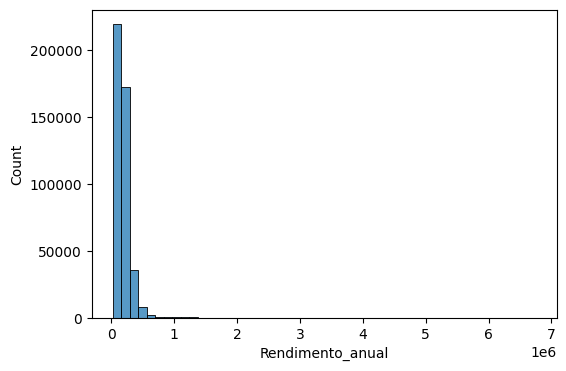

In [160]:
sns.histplot(data=df_cadastrados_limpo, x='Rendimento_anual', bins=50) 
plt.show()

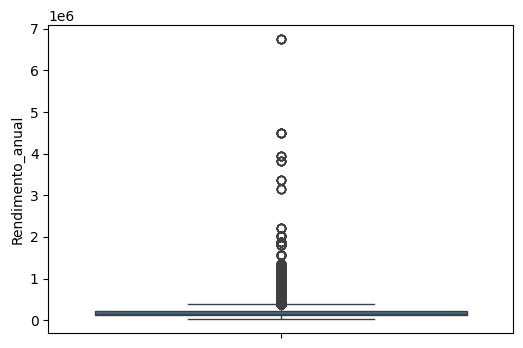

In [161]:
sns.boxplot(data=df_cadastrados_limpo, y='Rendimento_anual') 
plt.show()

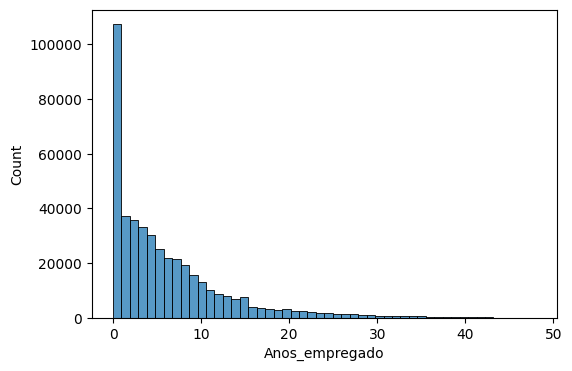

In [162]:
sns.histplot(data=df_cadastrados_limpo, x='Anos_empregado', bins=50) 
plt.show()

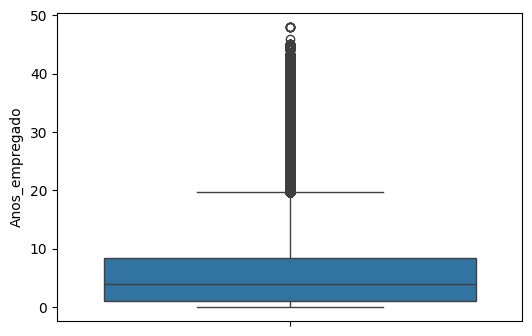

In [163]:
sns.boxplot(data=df_cadastrados_limpo, y='Anos_empregado') 
plt.show()

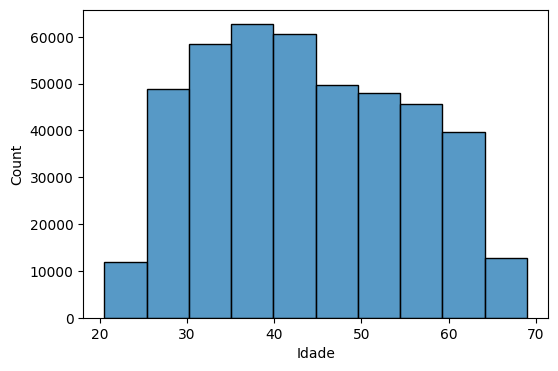

In [164]:
sns.histplot(data=df_cadastrados_limpo, x='Idade', bins=10) 
plt.show()

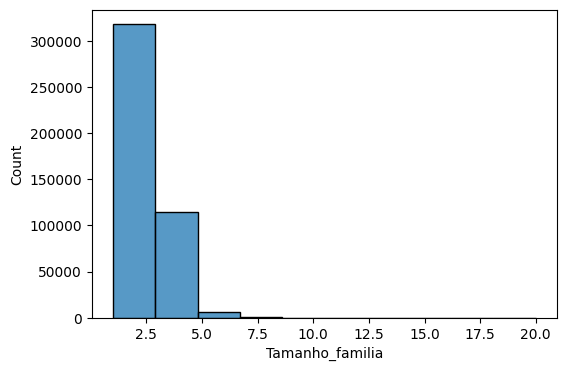

In [165]:
sns.histplot(data=df_cadastrados_limpo, x='Tamanho_familia', bins=10) 
plt.show()

# Aula 2 - Criando a Variável Target

In [166]:
aprovados = pd.read_csv("dados/clientes_aprovados.csv")
aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [167]:
aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [168]:
aprovados.query("ID_Cliente == 5001712")

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [169]:
aprovados.query("ID_Cliente == 5001711")

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


In [170]:
aprovados.Faixa_atraso.value_counts()

Faixa_atraso
pagamento realizado    442031
1-29 dias              383120
nenhum empréstimo      209230
30-59 dias              11090
>150 dias                1693
60-89 dias                868
90-119 dias               320
120-149 dias              223
Name: count, dtype: int64

In [171]:
df_registros_creditos_agrupados_ID = aprovados.groupby('ID_Cliente')
ser_abertura = df_registros_creditos_agrupados_ID.apply(lambda x: min(x["Mes_referencia"]))
ser_abertura.name = "Abertura"
ser_abertura

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_2289/1055250735.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ser_abertura = df_registros_creditos_agrupados_ID.apply(lambda x: min(x["Mes_referencia"]))


ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

In [172]:
df_clientes_aprovados = aprovados.merge(ser_abertura, on="ID_Cliente")

In [173]:
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [174]:
ser_final = df_registros_creditos_agrupados_ID.apply(lambda x: max(x["Mes_referencia"]))
ser_final.name = "Final"
ser_final

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_2289/4242181153.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ser_final = df_registros_creditos_agrupados_ID.apply(lambda x: max(x["Mes_referencia"]))


ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

In [175]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on="ID_Cliente")
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [176]:
df_clientes_aprovados["Janela"] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [177]:
df_clientes_aprovados["MOB"] = df_clientes_aprovados["Mes_referencia"] - df_clientes_aprovados["Abertura"]
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [178]:
# transformando a faixa de atraso em faixas numéricas
df_clientes_aprovados["Faixa_atraso"].unique()

array(['nenhum empréstimo', '1-29 dias', 'pagamento realizado',
       '30-59 dias', '60-89 dias', '90-119 dias', '120-149 dias',
       '>150 dias'], dtype=object)

In [179]:
dict_faixa_atraso_ind = {'nenhum empréstimo' :0, 
                         'pagamento realizado' :1, 
                         '1-29 dias' :2,
                         '30-59 dias' :3, 
                         '60-89 dias' :4, 
                         '90-119 dias' :5, 
                         '120-149 dias' :6,
                         '>150 dias' :7}

In [180]:
df_clientes_aprovados['Ind_faixa_atraso'] = df_clientes_aprovados["Faixa_atraso"].map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


In [181]:
df_clientes_aprovados["Mau_pagador"] = df_clientes_aprovados.apply(lambda x: 1 if x["Ind_faixa_atraso"] >3 else 0, axis=1)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_faixa_atraso,Mau_pagador
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


In [182]:
df_clientes_aprovados["Mau_pagador"].value_counts()

Mau_pagador
0    1045471
1       3104
Name: count, dtype: int64

In [183]:
df_registros_creditos_id = df_clientes_aprovados[["ID_Cliente", 
                                                  "Abertura", 
                                                  "Final", 
                                                  "Janela"]].groupby("ID_Cliente").apply(lambda x: x.iloc[0]).reset_index(drop=True)

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_2289/2574403534.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  "Janela"]].groupby("ID_Cliente").apply(lambda x: x.iloc[0]).reset_index(drop=True)


In [184]:
df_registros_creditos_id.head()

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59


In [185]:
df_denominador = df_registros_creditos_id.groupby("Abertura").apply(lambda x: x["ID_Cliente"].count()).reset_index()
df_denominador.columns = ["Abertura", "Qtd_clientes"]
df_denominador

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_2289/571031618.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_denominador = df_registros_creditos_id.groupby("Abertura").apply(lambda x: x["ID_Cliente"].count()).reset_index()


,Abertura,Qtd_clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [186]:
df_vintage = df_clientes_aprovados.groupby(['Abertura', 'MOB']).apply(lambda x: x["ID_Cliente"].count()).reset_index()
df_vintage.columns = ["Abertura", "MOB", "Qtd_clientes"]
df_vintage

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_2289/711374526.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_vintage = df_clientes_aprovados.groupby(['Abertura', 'MOB']).apply(lambda x: x["ID_Cliente"].count()).reset_index()


,Abertura,MOB,Qtd_clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [187]:
df_vintage = pd.merge(df_vintage[["Abertura", "MOB"]], df_denominador,
                      on="Abertura", how="left")

In [188]:
df_vintage

,Abertura,MOB,Qtd_clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


In [189]:
import numpy as np

In [190]:
df_vintage["Qtd_mau"] = np.nan

for j in range(-60, 1):
    ls = []
    for i in range(0, 61):
        due = list(df_clientes_aprovados.query('Mau_pagador == 1 and MOB ==@i and Abertura ==@j')["ID_Cliente"])
        ls.extend(due)
        df_vintage.loc[(df_vintage['MOB']== i) & (df_vintage['Abertura']==j), 'Qtd_mau'] = len(set(ls))

df_vintage["Taxa_de_mau"] = df_vintage['Qtd_mau'] / df_vintage['Qtd_clientes']
df_vintage

,Abertura,MOB,Qtd_clientes,Qtd_mau,Taxa_de_mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


In [191]:
df_vintage_pivot = df_vintage.pivot(index= "Abertura",
                                    columns='MOB',
                                    values="Taxa_de_mau")

In [192]:
df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


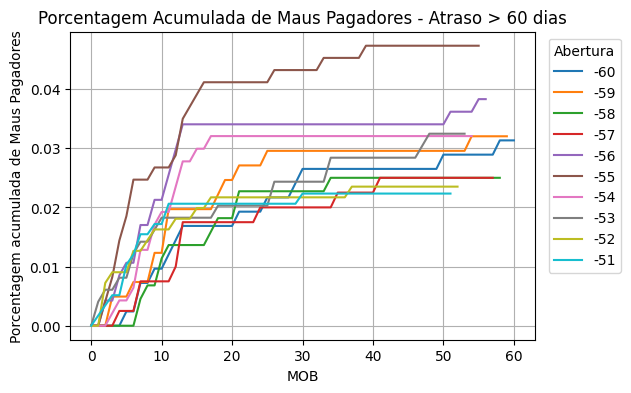

In [193]:
lst = [i for i in range(0,61)]
df_vintage_pivot[lst].T.iloc[:, :10].plot(legend=True, grid=True, 
                                          title='Porcentagem Acumulada de Maus Pagadores - Atraso > 60 dias')
plt.xlabel('MOB')
plt.ylabel('Porcentagem acumulada de Maus Pagadores')
plt.legend(bbox_to_anchor=(1.2, 1), title='Abertura')
plt.show()

Text(0, 0.5, 'Percentual de Clientes')

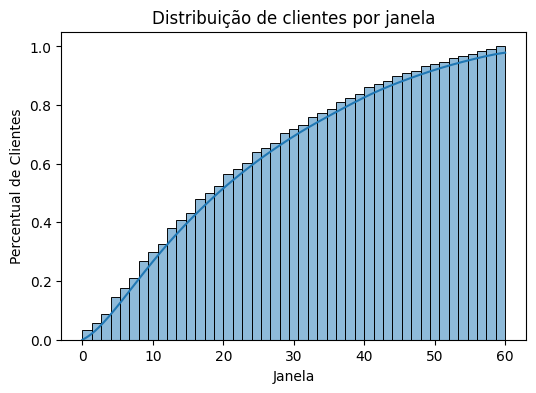

In [194]:
sns.histplot(data=df_registros_creditos_id, x='Janela', cumulative=True, 
             stat='density', kde=True)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de Clientes')

In [195]:
dict_intervalo_atraso = {'maior_30_dias': 3,
                         'maior_60_dias': 4,
                         'maior_90_dias': 5,
                         'maior_120_dias': 6,
                         'maior_150_dias': 7}

In [196]:
for chave, valor in dict_intervalo_atraso.items():
    df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x:1 if x['Ind_faixa_atraso'] >= valor else 0, axis=1)

df_clientes_aprovados.head(3)

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_faixa_atraso,Mau_pagador,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0


In [197]:
dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) #cumsum
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


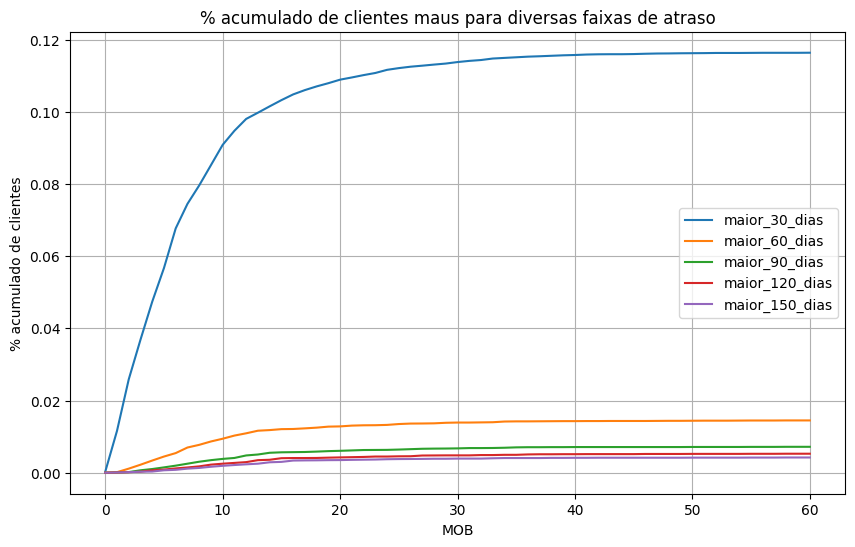

In [198]:
df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

In [205]:
len(df_clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente').count().index)

30918

In [206]:
df_clientes_aprovados_tratamento1 = df_clientes_aprovados.query('Janela >= 12').copy()
df_clientes_aprovados_tratamento1.shape

(943061, 14)

In [207]:
def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0
  
df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id.head()

/var/folders/rx/b37fngts0v1fljw_kvgpxnpm0000gn/T/ipykernel_2289/1374363571.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()


,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [208]:
df_registros_creditos_id.shape

(30918, 2)

In [210]:
df_registros_clientes_target = df_cadastrados_limpo.merge(df_registros_creditos_id, on='ID_Cliente')
df_registros_clientes_target.head(3)

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao,Mau
0,5008804,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro,0
1,5008805,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro,0
2,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança,0


In [ ]:
df_registros_clientes_target.head(3)

In [ ]:
df_registros_clientes_target['Mau'].value_counts(normalize=True)*100

# Aula 3 - Construindo a Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
seed = 1561651

In [ ]:
df_treino, df_teste = train_test_split(df_registros_clientes_target, test_size=0.2, random_state=seed)

In [ ]:
df_treino.shape

In [ ]:
df_teste.shape

In [ ]:
df_treino_copy = df_treino.copy()
df_teste_copy = df_teste.copy()

In [ ]:
#salvando os arquivos em CSV
df_treino.to_csv('train.csv', index=False)
df_teste.to_csv('teste.csv', index=False)

In [ ]:
df_treino.head(3)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
class class_drop_features(BaseEstimator, TransformerMixin):
    def __init__(self, feature_to_drop = ['ID_Cliente']):
        self.feature_to_drop = feature_to_drop
    def fit(self, df):
        return self
    def transform(self, df):
        if(set(self.feature_to_drop).issubset(df.columns)):
            df.drop(self.feature_to_drop, axis=1, inplace=True)
            return df
        else:
            print('Uma ou mais features não estão no Dataframe - drop_features')
            return df

In [ ]:
class class_min_max(BaseEstimator, TransformerMixin):
    def __init__(self, min_max_scaler = ['Tamanho_familia', 'Rendimento_anual', 'Idade', 'Anos_empregado']):
        self.min_max_scaler = min_max_scaler
    def fit(self, df):
        return self
    def transform(self, df):
        if (set(self.min_max_scaler).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler] = min_max_enc.fit_transform(df[self.min_max_scaler])
            return df
        else:
            print('Uma ou mais features não estão no Dataframe - min_max')
            return df

In [ ]:
class class_one_hot_enc_names(BaseEstimator, TransformerMixin):
    def __init__(self, one_hot_encoding = ['Categoria_de_renda', 'Estado_civil', 'Moradia', 'Ocupacao']):
        self.one_hot_encoding = one_hot_encoding
    
    def fit(self, df):
        return self
    
    def transform(self, df):
        if(set(self.one_hot_encoding).issubset(df.columns)):
            # função para rodar o OneHotEncoder nas features
            def onehot_features(df, one_hot_encoding):
                onehot_features = OneHotEncoder()
                onehot_features.fit(df[one_hot_encoding])
                
                #obtendo o nome das colunas
                feature_names = onehot_features.get_feature_names_out(one_hot_encoding)
                
                # transformando o array em um dataframe com o nome das colunas
                df = pd.DataFrame(onehot_features.transform(df[self.one_hot_encoding]).toarray(),
                                  columns= feature_names, index=df.index)
                
                return df
            
            #função para concatenar as features que passaram pelo fit dos dados com o restante 
            def concat_df(df, onehotenc_df, one_hot_encoding):
                outras_features = [feature for feature in df.columns if feature not in one_hot_encoding]
                df_concat = pd.concat([onehotenc_df, df[outras_features]], axis=1)
                return df_concat
            
            df_onehotencoding = onehot_features(df, self.one_hot_encoding)
            
            # retorna o df concatenado
            df_full = concat_df(df, df_onehotencoding, self.one_hot_encoding)
            return df_full
        
        else:
            print('Uma ou mais features não estão no Dataframe - min_max')
            return df

In [ ]:
class class_ordinal_feature(BaseEstimator, TransformerMixin):
    def __init__(self, ordinal_feature = ['Grau_escolaridade']):
        self.ordinal_feature = ordinal_feature
    
    def fit(self, df):
        return self
    
    def transform(self, df):
        if 'Grau_escolaridade' in df.columns:
            ord_encoder = OrdinalEncoder()
            df[self.ordinal_feature] = ord_encoder.fit_transform(df[self.ordinal_feature])
            return df
        else:
            print('Grau_escolaridade não está no Dataframe')
            return df

In [ ]:
class class_oversample(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, df):
        return self
    
    def transform(self, df):
        if 'Mau' in df.columns:
            # usando a função SMOTE para superamostrar a clase minoritária e corrigir dados desbalanceados
            oversample = SMOTE(sampling_strategy='minority')
            X_bal, y_bal = oversample.fit_resample(df.loc[:, df.columns !='Mau'], df['Mau'])
            df_balanceado = pd.concat([pd.DataFrame(X_bal), pd.DataFrame(y_bal)], axis=1)
            return df_balanceado
        else:
            print("O target não está no Dataframe")
            return df

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
def df_pipeline(df):
    pipeline = Pipeline([
        ('feature_dropper', class_drop_features()),
        ('MinMaxScaler', class_min_max()),
        ('OneHotEncoding', class_one_hot_enc_names()),
        ('OrdinalFeatures', class_ordinal_feature()),
        ('Oversample', class_oversample())
    ])
    
    df_pipeline = pipeline.fit_transform(df)
    return df_pipeline

# Aula 4 - Machine Learning: Escolhendo o melhor modelo

In [ ]:
treino = df_pipeline(df_treino)

In [ ]:
treino.head()

In [ ]:
treino['Mau'].value_counts(normalize=True)*100 # agora os dados não estão mais desbalanceados

In [ ]:
treino.shape

In [ ]:
X_treino, y_treino = treino.loc[:, treino.columns != 'Mau'], treino['Mau'] # y é sempre a nossa coluna target

In [ ]:
teste = df_pipeline(df_teste)

In [ ]:
teste.head()

In [ ]:
X_teste, y_teste = teste.loc[:, teste.columns != 'Mau'], teste['Mau'] 

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def roda_modelo(modelo):
    modelo.fit(X_treino, y_treino)
    
    prob_predict = modelo.predict_proba(X_teste)
    
    print(f'\n------------------------ Resultados {modelo} ------------------------\n \n')
    
    data_bom = np.sort(modelo.predict_proba(X_teste)[:, 0])
    data_mau = np.sort(modelo.predict_proba(X_teste)[:, 1])
    kstest = stats.ks_2samp(data_bom, data_mau)
    
    print(f'>> Métrica KS: {kstest}')
    
    print(f'\nConfusion Matrix\n')
    
    fig, ax = plt.subplots(figsize=(7,7))
    matriz_confusao = ConfusionMatrixDisplay.from_estimator(modelo, X_teste, y_teste, normalize='true',
                                            display_labels=['Bom pagador', 'Mau pagador'],
                                            ax=ax, cmap=plt.cm.Blues)
    ax.set_title('Matriz de Confusão\nNormalizada', fontsize=14, fontweight='bold')
    ax.set_xlabel('Label predita', fontsize=12)
    ax.set_ylabel('Label verdadeira', fontsize=12)
    plt.grid(False)
    plt.show(matriz_confusao)
    
    predicao = modelo.predict(X_teste)
    print(f'\n \n>> Classification Report\n')
    print(classification_report(y_teste, predicao, zero_division=0))
    
    print(f'\n \n------------------------ ROC curve ------------------------\n')
    metrics.RocCurveDisplay.from_estimator(modelo, X_teste, y_teste)

In [ ]:
# importando os modelos de Machine Learning 
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()

In [ ]:
roda_modelo(modelo_logistico)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier()

In [ ]:
roda_modelo(modelo_tree)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_xgb = GradientBoostingClassifier()

In [ ]:
roda_modelo(modelo_xgb)

In [ ]:
import joblib

In [ ]:
joblib.dump(modelo_xgb, 'xgb.joblib')